In [79]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from mtcnn import MTCNN
import shutil

def detect_and_save_faces(image_path, output_dir='detected_faces', grays=True, resize=True, show=True):
    # Load the image
    image = cv2.imread(image_path)

    # Detect faces in the image
    detector = MTCNN()
    faces = detector.detect_faces(image)

    # Create a directory to store the face images
    os.makedirs(output_dir, exist_ok=True)

    # Save each detected face as a separate image
    for i, face in enumerate(faces):
        x, y, w, h = face['box']
        face_image = image[y:y+h, x:x+w]
        if grays:
            face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
        if resize:
            face_image = cv2.resize(face_image, (48, 48), interpolation=cv2.INTER_AREA)
        output_path = os.path.join(output_dir, f'face_{i}.jpg')
        cv2.imwrite(output_path, face_image)
        if show:
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    if show:
        # Display the image with bounding boxes
        cv2.imshow('Face Detection', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()


def move_file_by_name(file_name, source_dir='angry', destination_dir='angry_discarded'):
    source_path = os.path.join(source_dir, file_name)
    destination_path = os.path.join(destination_dir, file_name)
    shutil.move(source_path, destination_path)



def print_all_faces_in_folder(dir):
    for file_name in os.listdir(dir):
        image = cv2.imread(os.path.join(dir, file_name))
        plt.imshow(image, cmap='gray')
        plt.title(file_name, fontsize=16)
        plt.show()



## Save Segmented Class Image

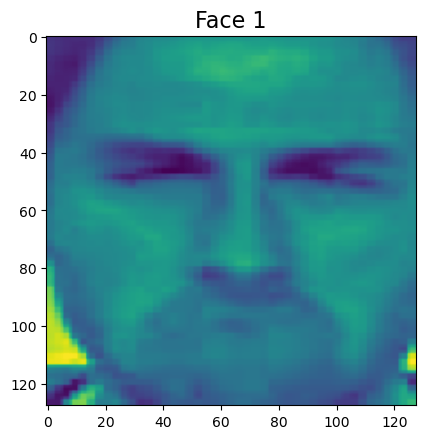

In [83]:
# FACE DETECTION PIPELINE
#___________________________________

# # Load the image
# image = cv2.imread('original_fotos/angry_class_1.jpg')

# # Detect faces in the image
# detector = MTCNN()
# faces = detector.detect_faces(image)

# # Create a directory to store the face images
# os.makedirs('presentation', exist_ok=True)

# # Save each detected face as a separate image
# for i, face in enumerate(faces):
#     x, y, w, h = face['box']
#     face_image = image[y:y+h, x:x+w]
#     if i == 1:
#         face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
#         face_image = cv2.resize(face_image, (128, 128), interpolation=cv2.INTER_AREA)
#         cv2.imwrite('presentation/Karl128.jpg', face_image)
#         plt.imshow(face_image)
#         plt.title(f'Face {i}', fontsize=16)
#         plt.show()


# SCRAPE TROELS GALLERY
#___________________________________

# folder = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
# troels = [20, 35, 22, 20, 33, 33, 32]

# for i, dir in enumerate(folder):
#     image = cv2.imread(f'emotions/{dir}/face_{troels[i]}.jpg')
#     cv2.imwrite(f'presentation/troels_{dir}.jpg', image)

### Blind Test

In [36]:
# get a list of all the file paths in emotions folder

folder = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


file_paths = []
true_label = []

for dir in folder:
     for file in os.listdir(f'emotions/{dir}'):
         file_paths.append(f'emotions/{dir}/{file}')
         true_label.append(folder.index(dir))

random_indexes = np.random.permutation(len(file_paths))



face_9.jpg  had accuracy 58.17 %


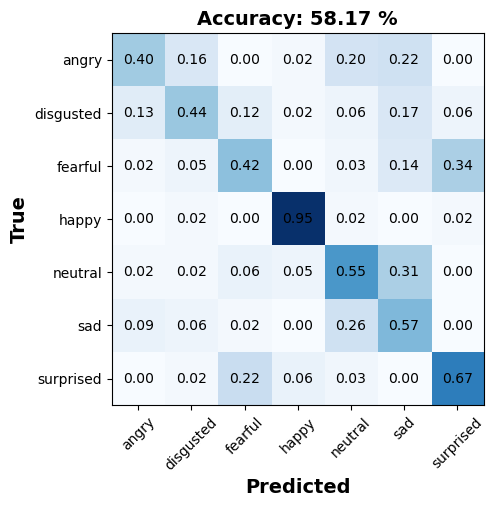

In [85]:
true_label_masked = []
for i in random_indexes:
    true_label_masked.append(true_label[i])
human_label = np.loadtxt('human.txt', dtype=int)

def calculate_accuracy(true_, pred_):
    
    correct = 0
    for i in range(404):
        if true_[i] == pred_[i]:
            correct += 1
        
    accuracy = correct / 404
    print(file, f' had accuracy {100*accuracy:.2f} %')
    return accuracy


def confusion_matrix(true_, pred_, folder=['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']):

    confusion_matrix = np.zeros((7, 7))

    for i in range(404):
        confusion_matrix[true_[i], pred_[i]] += 1
    
    plt.matshow(confusion_matrix, cmap='Blues', origin='upper')

    # plot the numbers in the matrix
    for i in range(7):
        for j in range(7):
            plt.text(j, i, f'{confusion_matrix[i, j]/np.sum(confusion_matrix[i,:]):.2f}', ha='center', va='center', color='black')
    # set labels at tickmarks
    ax = plt.gca()
    ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)
    plt.xticks(np.arange(7), folder, rotation=45)
    plt.yticks(np.arange(7), folder)
    # plt.colorbar()
    plt.xlabel('Predicted', fontsize=14, fontweight='bold')
    plt.ylabel('True', fontsize=14, fontweight='bold')
    plt.title(f'Accuracy: {100*calculate_accuracy(true_, pred_):.2f} %', fontsize=14, fontweight='bold')
    plt.show()
    

confusion_matrix(true_label_masked, human_label)





In [38]:
# for i, index in enumerate(random_indexes):
#     plt.imshow(cv2.imread(file_paths[index]))
#     plt.title(f'Picture: {i+1}', fontsize=14)
#     plt.show()

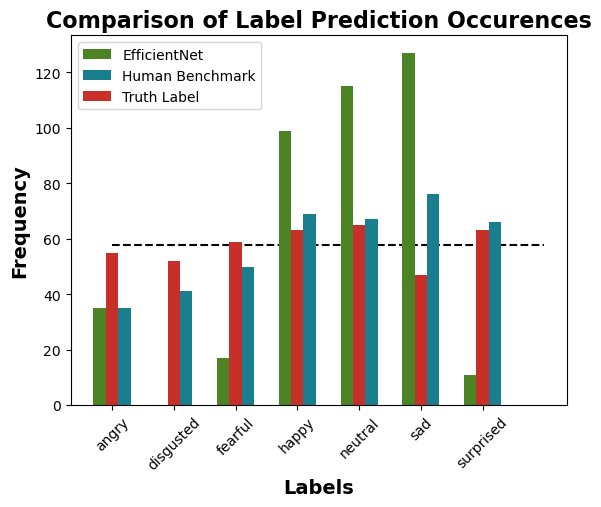

In [111]:
data = np.genfromtxt('y_pred_class_pictures.csv', delimiter=',', dtype=int)
emilie_labels = data[1:,:][:,1]
true_label_masked = np.array(true_label_masked)

folder = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

X_axis = np.arange(len(folder))
emilie = [np.sum(emilie_labels == i) for i in range(7)]
ground_truth = [np.sum(true_label_masked == i) for i in range(7)]
human = [np.sum(human_label == i) for i in range(7)]
  
plt.plot((0, 7), (404/7, 404/7), color='black', linestyle='--', zorder=1)  
plt.bar(X_axis - 0.2, emilie, 0.2, label = 'EfficientNet', color='#4b8325') 
plt.bar(X_axis + 0.2, human, 0.2, label = 'Human Benchmark', color='#197f8e') 
plt.bar(X_axis, ground_truth, 0.2, label = 'Truth Label', color='#c73028')


  
plt.xticks(X_axis, folder, rotation=45) 
plt.xlabel("Labels", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=14, fontweight='bold') 
plt.title("Comparison of Label Prediction Occurences", fontsize=16, fontweight='bold')
plt.legend() 
plt.show() 

